In [2]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['svg.fonttype'] = 'none'


In [9]:
# pdeep_prosit_compare = {'trypsin': (1345, 148060, 2607), 'chymo': (4983, 82108, 38592), 
#               'lysc': (591, 82497, 2593), 'gluc': (1837, 54957, 29416)}

pcc_compare = {'trypsin': (475, 148938, 863), 'chymo': (7356, 85960, 15255), 'lysc': (703, 82299, 1282), 'gluc': (3851, 55212, 11854)}


In [10]:
pdeep_prosit_compare = {'trypsin': (419, 150480, 491), 'chymo': (2816, 130922, 2034), 'lysc': (409, 85004, 485), 'gluc': (1173, 88379, 881)}
# prosit_prosit_compare = {'sprot_human': (170, 4208, 536), 'IGC': (945, 53414, 2889), 'sprot_all': (534, 12520, 1372), 'sprot_bacteria_human': (358, 12442, 1378), 'trypsin': (2652, 148442, 2225), 'chymo': (3307, 131845, 5804), 'lysc': (687, 84926, 1159), 'gluc': (1250, 89268, 3588), 'davis': (323, 38004, 554)}

In [11]:
def number2str(num, interal=3):
    new_num = []
    for i, s in enumerate(str(num)[::-1]):
        if i!=0 and i%interal == 0:
            new_num.append(",")
        new_num.append(s)
    return "".join(new_num[::-1])
    
def autolabel(rects, ax, numbers, percent_number, mode="inside", fontsize=12, select_idx=None, inside_height=0.35):
    assert len(rects) == len(numbers)
    for idx, rect in enumerate(rects):
        height = rect.get_height()
        if select_idx is not None and idx not in select_idx:
            continue
        if mode == 'inside':
            ax.text(rect.get_x() + rect.get_width()/2., inside_height*height + rect.get_y(),
                    number2str(numbers[idx]) + f"({percent_number[idx]:.1f}%)",
                    ha='center', va='bottom', rotation=90, color='white', fontsize=fontsize)
        if mode == 'upper':
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y() + height + 3,
                    number2str(numbers[idx]) + f"({percent_number[idx]:.1f}%)",
                    ha='center', va='bottom', rotation=90, color='black', fontsize=fontsize)
        if mode == 'bottom':
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y()+height,
                    number2str(numbers[idx]) + f"({percent_number[idx]:.1f}%)",
                    ha='center', va='top', rotation=90, color='black', fontsize=fontsize)


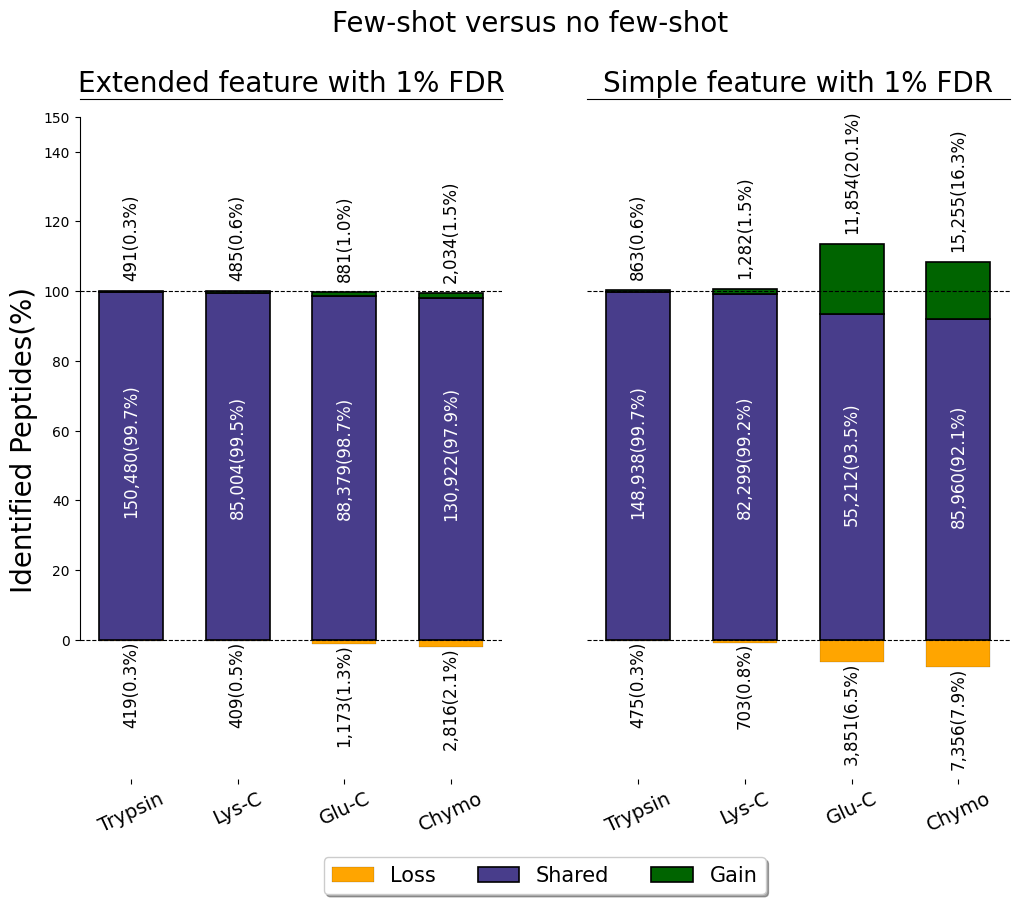

In [15]:
from matplotlib.patches import FancyBboxPatch
labels = ["trypsin", 'lysc', 'gluc', 'chymo']
show_labels = ["Trypsin", 'Lys-C', 'Glu-C', 'Chymo']
losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['Extended feature'] = [-pdeep_prosit_compare[l][0]/sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
shares['Extended feature'] = [pdeep_prosit_compare[l][1]/sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
gains['Extended feature'] = [pdeep_prosit_compare[l][2]/sum(pdeep_prosit_compare[l][:2])*100 for l in labels]

losses_num['Extended feature'] = [pdeep_prosit_compare[l][0] for l in labels]
shares_num['Extended feature'] = [pdeep_prosit_compare[l][1] for l in labels]
gains_num['Extended feature'] = [pdeep_prosit_compare[l][2] for l in labels]

losses['Simple feature'] = [-pcc_compare[l][0]/sum(pcc_compare[l][:2])*100 for l in labels]
shares['Simple feature'] = [pcc_compare[l][1]/sum(pcc_compare[l][:2])*100 for l in labels]
gains['Simple feature'] = [pcc_compare[l][2]/sum(pcc_compare[l][:2])*100 for l in labels]

losses_num['Simple feature'] = [pcc_compare[l][0] for l in labels]
shares_num['Simple feature'] = [pcc_compare[l][1] for l in labels]
gains_num['Simple feature'] = [pcc_compare[l][2] for l in labels]

width = 0.6

names = ['Extended feature', 'Simple feature']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = [i[0].capitalize() + i[1:] for i in labels]
for i, (name, ax) in enumerate(zip(names, axs)):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(show_labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(show_labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(show_labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 12
    autolabel(p1, ax, losses_num[name], [abs(i) for i in losses[name]], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], shares[name],fontsize=num_size)
    if i == 1:
        autolabel(p3, ax, gains_num[name], gains[name],mode='upper',
            select_idx=[0, 1, 2, 3], fontsize=num_size)
        # autolabel(p3, ax, gains_num[name], gains[name],mode='inside',
        #         select_idx=[2, 3], fontsize=num_size, inside_height=0.05)
    else:
        autolabel(p3, ax, gains_num[name], gains[name],mode='upper',
            select_idx=[0, 1, 2, 3], fontsize=num_size)

    if i ==0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.1),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{name} with 1% FDR', fontsize=20)
    if i == 0:
        ax.get_yaxis().set_ticks([20*i for i in range(8)] + [150])
        ax.spines['left'].set_bounds(0, 150)
    else:
        ax.get_yaxis().set_ticks([])
        ax.spines['left'].set_visible(False)
    ax.set_ylim(-40, 155)
    # ax.tick_params(axis='x', labelsize=15)
    # ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', labelsize=14, rotation=25)

# fig.autofmt_xdate(rotation=15)
fig.suptitle('Few-shot versus no few-shot', fontsize=20)
fig.savefig(f"figs/fig2-pdeep-bekker-sa-pcc-vennbar.png",dpi=300, bbox_inches="tight")


In [ ]:
{'trypsin': (2126, 147675, 2685), 'chymo': (10213, 91002, 25710), 'lysc': (1203, 82378, 2502), 'gluc': (3892, 63174, 18985)}
